In [16]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
from functools import partial
from matplotlib.animation import FuncAnimation

from single_layer_networks.deltarule import Neuron

In [17]:
X = load_iris().data
X = X[:100, [2,3]]
y = load_iris().target[:100]

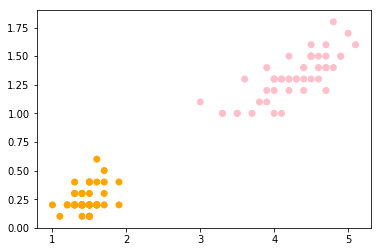

In [3]:
c = ListedColormap(['orange', 'pink'])
plt.scatter(X[:, 0], X[:, 1], cmap=c, c=y)
plt.show()

In [27]:
def plot_line(coefs):
    """
    Рисует линию
    :params coefs: (weights, bias); weights.shape = (2, 1), bias = число
    """
    w, bias = coefs
    a, b = - w[0][0] / w[1][0], - bias / w[1][0]
    xx = np.linspace(*plt.xlim())
    line.set_data(xx, a*xx + b)

In [31]:
def step_by_step(n, X, y, max_steps=1e6, eps = 0.001):
    """
    Последовательно обучает нейрон
    :params n: Нейрон
    """
    i = 0
    
    while i < max_steps:
        i += 1
        err_sum = 0
        for example, answer in zip(X, y):
            example = np.array([example])
            answer = np.array([answer])
            z, error = n.fit(example, answer,eta=0.1, bunch_size=1, num_epochs=1)
            err_sum += error
            yield n._w[:2], n._w[2]
        if err_sum < eps:
            break
    for _ in range(20): yield n._w[:2], n._w[2]

<IPython.core.display.Javascript object>


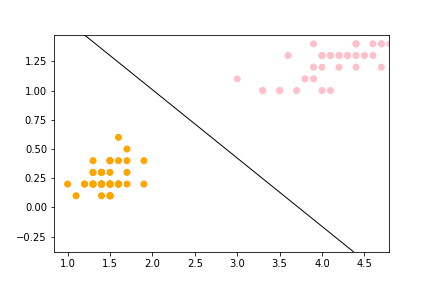

In [32]:
%matplotlib notebook
#%matplotlib nbagg
fig = plt.figure()
c = ListedColormap(['orange', 'pink'])
plt.scatter(X[:, 0], X[:, 1], cmap=c, c=y)
line, = plt.plot([],[], color='black', linewidth=1)
n = Neuron(2)
weights_ani = partial(step_by_step, n=n, X=X, y=y)
ani = FuncAnimation(fig, func=plot_line, frames=weights_ani, blit=False, interval=10, repeat=True)
plt.show()